In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load cleaned dataset:
vg_sales = pd.read_csv('./dataset/vg_sales_cleaned.csv', index_col=0)

In [3]:
vg_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


## EDA on Video Games Sales

**FOCUS:**

**Video Game Trend**
- How is the trend for video games increase for the past years?

In [4]:
vg_sales['Year_of_Release'] = vg_sales['Year_of_Release'].astype(np.int)

In [5]:
year_sales_count = vg_sales['Year_of_Release'].value_counts().sort_index()

In [10]:
year_sales_count

1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     220
1996     263
1997     289
1998     389
1999     338
2000     350
2001     482
2002     829
2003     821
2004     796
2005     939
2006    1006
2007    1197
2008    1524
2009    1456
2010    1280
2011    1136
2012     653
2013     552
2014     582
2015     606
2016     502
2017       3
2020       1
Name: Year_of_Release, dtype: int64

<BarContainer object of 39 artists>

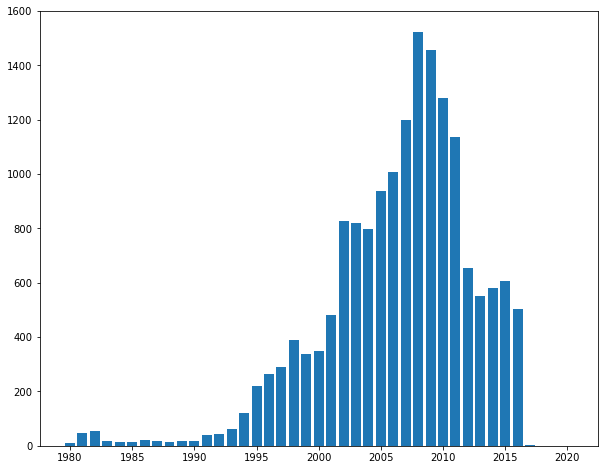

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(year_sales_count.index, year_sales_count.values)